In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import argparse
import sys
import gzip
import operator
from scipy import stats
import scipy as sp
import json
from sklearn.metrics import normalized_mutual_info_score
import community
import datetime as dt
from tqdm import tqdm_notebook

from network_ei import *
from causal_emergence import *
from get_motifs import *

import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib._png import read_png
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

%matplotlib inline

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 08: Effective Information Differences in Real Networks

Null models and real networks

In [2]:
cols = ["#ce4fa5","#60a75c","#8567d0","#ad963e","#5896cb","#cb683a","#af75ae","#ca5668"]
p0 = 0

# Citations

In [3]:
# citation_dict = {'Name':["Citeseer Citations"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/citations/citeseer/out.citeseer"]}

# for fn in citation_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         citation_dict['Network'].append(g)
        
# print()
# for net in range(len(citation_dict['Network'])):
#     print(citation_dict['Name'][net], "has",
#           citation_dict['Network'][net].number_of_nodes(), "nodes and",
#           citation_dict['Network'][net].number_of_edges(), "edges.")

In [4]:
# citation_dict = {'Name':["High Energy Physics - Phenomenology","High Energy Physics - Theory",
#                          "Cora Citations", "DBLP Citations"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/citations/cit-HepPh/out.cit-HepPh", 
#                              "../data/konect_data/citations/cit-HepTh/out.cit-HepTh",
#                              "../data/konect_data/citations/subelj_cora/out.subelj_cora_cora",
#                              "../data/konect_data/citations/dblp-cite/out.dblp-cite"]}

# for fn in citation_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         citation_dict['Network'].append(g)
        
# print()
# for net in range(len(citation_dict['Network'])):
#     print(citation_dict['Name'][net], "has",
#           citation_dict['Network'][net].number_of_nodes(), "nodes and",
#           citation_dict['Network'][net].number_of_edges(), "edges.")

# Coauthorships

In [5]:
# coauthor_dict = {'Name':["DBLP Coauthorships"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/coauthorship/com-dblp/out.com-dblp"]}

# for fn in coauthor_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('paperID', float)])
#         coauthor_dict['Network'].append(g)
        
# print()
# for net in range(len(coauthor_dict['Network'])):
#     print(coauthor_dict['Name'][net], "has",
#           coauthor_dict['Network'][net].number_of_nodes(), "nodes and",
#           coauthor_dict['Network'][net].number_of_edges(), "edges.")

In [6]:
# coauthor_dict = {'Name':["arXiv Astrophysics Coauthorships", "High Energy Physics - Phenomenology Coauthorships",
#                          "High Energy Physics - Theory Coauthorships"],
#                  "Network":[], 
#                  "Filename":["../data/konect_data/coauthorship/ca-AstroPh/out.ca-AstroPh", 
#                              "../data/konect_data/coauthorship/ca-cit-HepPh/out.ca-cit-HepPh", 
#                              "../data/konect_data/coauthorship/ca-cit-HepTh/out.ca-cit-HepTh"]}

# for fn in coauthor_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('paperID', float)])
#         coauthor_dict['Network'].append(g)
        
# print()
# for net in range(len(coauthor_dict['Network'])):
#     print(coauthor_dict['Name'][net], "has",
#           coauthor_dict['Network'][net].number_of_nodes(), "nodes and",
#           coauthor_dict['Network'][net].number_of_edges(), "edges.")

# Communication

In [7]:
# communic_dict = {'Name':["Enron Emails"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/communication/enron/out.enron"]}

# for fn in communic_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('timestamp', float)])
#         communic_dict['Network'].append(g)
        
# print()
# for net in range(len(communic_dict['Network'])):
#     print(communic_dict['Name'][net], "has",
#           communic_dict['Network'][net].number_of_nodes(), "nodes and",
#           communic_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/communication/enron/out.enron

Enron Emails has 87273 nodes and 321918 edges.


In [9]:
# G = communic_dict['Network'][0]
# W_out = get_Wout(G, p0)
# print('.')
# W_in  = get_Win( G, p0)
# print('..')
# N_out = W_out.shape[0]
# test = []
# if N_out > 0 and sum(sum(W_out))>0:
#     print('...')
#     for i in tqdm_notebook(range(len(W_out))):
#         if i%1000==0:
#             print('ello')
#         W_outi = W_out[i]
#         test.append(sp.stats.entropy(W_outi, W_in, base=2))
#     xx = sum(test)/N_out

# print(communic_dict['Name'][0],"has an EI of", xx)
# tqdm(print(citation_dict['Name'],"has an EI of", get_ei(citation_dict['Network'][0], p0)))

['Enron Emails'] has an EI of 9.45082342737


In [10]:
# enron_dict = {'names':communic_dict['Name'][0], 
#               'types':'communication', 
#               'nodes':87273, 
#               'edges':321918, 
#               'effin':9.45082342737, 
#               'effec':9.45082342737/np.log2(87273), 
#               'deter':get_determinism(G,p0), 
#               'degen':get_degeneracy(G,p0),
#               'color':"#daaa32", 
#               'num':76, 
#               'newty':'social', 
#               'newco':'#865db4'}

In [11]:
print(enron_dict)

{'names': 'Enron Emails', 'types': 'communication', 'nodes': 87273, 'edges': 321918, 'effin': 9.45082342737, 'effec': 0.57580459149689722, 'deter': 14.853130630766957, 'degen': 5.4023072033994257, 'color': '#daaa32', 'num': 76, 'newty': 'social', 'newco': '#865db4'}


In [36]:
# communic_dict = {'Name':["Tarragona Emails", "DNC Emails", "EU Emails", 
#                          "Facebook Wall Posts", "Linux Kernel Email List", "Digg Replies", "UC Irvine Messages",
#                          "Manufacturing Company Emails", "Slashdot Threads"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/communication/arenas-email/out.arenas-email", 
#                              "../data/konect_data/communication/dnc-temporalGraph/out.dnc-temporalGraph", 
#                              "../data/konect_data/communication/email-EuAll/out.email-EuAll", 
#                              "../data/konect_data/communication/facebook-wosn-wall/out.facebook-wosn-wall",
#                              "../data/konect_data/communication/lkml-reply/out.lkml-reply", 
#                              "../data/konect_data/communication/munmun_digg_reply/out.munmun_digg_reply", 
#                              "../data/konect_data/communication/opsahl-ucsocial/out.opsahl-ucsocial", 
#                              "../data/konect_data/communication/radoslaw_email/out.radoslaw_email_email", 
#                              "../data/konect_data/communication/slashdot-threads/out.slashdot-threads"]}

# for fn in communic_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('timestamp', float)])
#         communic_dict['Network'].append(g)
        
# print()
# for net in range(len(communic_dict['Network'])):
#     print(communic_dict['Name'][net], "has",
#           communic_dict['Network'][net].number_of_nodes(), "nodes and",
#           communic_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/communication/arenas-email/out.arenas-email
../data/konect_data/communication/dnc-temporalGraph/out.dnc-temporalGraph
../data/konect_data/communication/email-EuAll/out.email-EuAll
../data/konect_data/communication/facebook-wosn-wall/out.facebook-wosn-wall
../data/konect_data/communication/lkml-reply/out.lkml-reply
../data/konect_data/communication/munmun_digg_reply/out.munmun_digg_reply
../data/konect_data/communication/opsahl-ucsocial/out.opsahl-ucsocial
../data/konect_data/communication/radoslaw_email/out.radoslaw_email_email
../data/konect_data/communication/slashdot-threads/out.slashdot-threads

Tarragona Emails has 1133 nodes and 5451 edges.
DNC Emails has 1891 nodes and 5598 edges.
EU Emails has 265214 nodes and 420045 edges.
Facebook Wall Posts has 46951 nodes and 274085 edges.
Linux Kernel Email List has 27927 nodes and 242976 edges.
Digg Replies has 30398 nodes and 86403 edges.
UC Irvine Messages has 1899 nodes and 20295 edges.
Manufacturing Company Emails 

# Computer

In [12]:
# computer_dict = {'Name':["Skitter Autonomous Systems"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/computer/as-skitter/out.as-skitter"]}

# for fn in computer_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('timestamp', float)])
#         computer_dict['Network'].append(g)
        
# print()
# for net in range(len(computer_dict['Network'])):
#     print(computer_dict['Name'][net], "has",
#           computer_dict['Network'][net].number_of_nodes(), "nodes and",
#           computer_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/computer/as-skitter/out.as-skitter

Skitter Autonomous Systems has 1696415 nodes and 11095298 edges.


In [37]:
# computer_dict = {'Name':["CAIDA Autonomous Systems", 
#                          "as20000102 Autonomous Systems", "p2p Gnutella", "Internet Autonomous Systems"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/computer/as-caida20071105/out.as-caida20071105", 
#                              "../data/konect_data/computer/as20000102/out.as20000102", 
#                              "../data/konect_data/computer/p2p-Gnutella31/out.p2p-Gnutella31", 
#                              "../data/konect_data/computer/topology/out.topology"]}

# for fn in computer_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('timestamp', float)])
#         computer_dict['Network'].append(g)
        
# print()
# for net in range(len(computer_dict['Network'])):
#     print(computer_dict['Name'][net], "has",
#           computer_dict['Network'][net].number_of_nodes(), "nodes and",
#           computer_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/computer/as-caida20071105/out.as-caida20071105
../data/konect_data/computer/as20000102/out.as20000102
../data/konect_data/computer/p2p-Gnutella31/out.p2p-Gnutella31
../data/konect_data/computer/topology/out.topology

CAIDA Autonomous Systems has 26475 nodes and 53381 edges.
as20000102 Autonomous Systems has 6474 nodes and 13895 edges.
p2p Gnutella has 62586 nodes and 147892 edges.
Internet Autonomous Systems has 34761 nodes and 114495 edges.


# Human Contact

In [38]:
# humancon_dict = {'Name':["RFID Contact", "Reality Mining", "California Windsurfers", "Train Terrorists",
#                          "RFID Hypertext Conference", "RFID Infectious Conference"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/humancontact/contact/out.contact", 
#                              "../data/konect_data/humancontact/mit/out.mit", 
#                              "../data/konect_data/humancontact/moreno_beach/out.moreno_beach_beach", 
#                              "../data/konect_data/humancontact/moreno_train/out.moreno_train_train", 
#                              "../data/konect_data/humancontact/sociopatterns-hypertext/out.sociopatterns-hypertext",
#                              "../data/konect_data/humancontact/sociopatterns-infectious/out.sociopatterns-infectious"]}

# for fn in humancon_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         humancon_dict['Network'].append(g)
        
# print()
# for net in range(len(humancon_dict['Network'])):
#     print(humancon_dict['Name'][net], "has",
#           humancon_dict['Network'][net].number_of_nodes(), "nodes and",
#           humancon_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/humancontact/contact/out.contact
../data/konect_data/humancontact/mit/out.mit
../data/konect_data/humancontact/moreno_beach/out.moreno_beach_beach
../data/konect_data/humancontact/moreno_train/out.moreno_train_train
../data/konect_data/humancontact/sociopatterns-hypertext/out.sociopatterns-hypertext
../data/konect_data/humancontact/sociopatterns-infectious/out.sociopatterns-infectious

RFID Contact has 274 nodes and 2899 edges.
Reality Mining has 96 nodes and 2539 edges.
California Windsurfers has 43 nodes and 335 edges.
Train Terrorists has 64 nodes and 242 edges.
RFID Hypertext Conference has 113 nodes and 2195 edges.
RFID Infectious Conference has 410 nodes and 2764 edges.


# Human Social

In [39]:
# humansoc_dict = {'Name':["Jazz Musicians", "Ad Health", "Physician Innovations", "University Residents", 
#                          "Monk Cloister Network", "7th Grade Students", "Household Gift-giving", 
#                          "Freshmen Students", "Gahuku–Gama Alliance Structure"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/humansocial/arenas-jazz/out.arenas-jazz", 
#                              "../data/konect_data/humansocial/moreno_health/out.moreno_health_health", 
#                              "../data/konect_data/humansocial/moreno_innovation/out.moreno_innovation_innovation", 
#                              "../data/konect_data/humansocial/moreno_oz/out.moreno_oz_oz", 
#                              "../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson", 
#                              "../data/konect_data/humansocial/moreno_seventh/out.moreno_seventh_seventh", 
#                              "../data/konect_data/humansocial/moreno_taro/out.moreno_taro_taro", 
#                              "../data/konect_data/humansocial/moreno_vdb/out.moreno_vdb_vdb", 
#                              "../data/konect_data/humansocial/ucidata-gama/out.ucidata-gama"]}

# for fn in humansoc_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         humansoc_dict['Network'].append(g)
        
# print()
# for net in range(len(humansoc_dict['Network'])):
#     print(humansoc_dict['Name'][net], "has",
#           humansoc_dict['Network'][net].number_of_nodes(), "nodes and",
#           humansoc_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/humansocial/arenas-jazz/out.arenas-jazz
../data/konect_data/humansocial/moreno_health/out.moreno_health_health
../data/konect_data/humansocial/moreno_innovation/out.moreno_innovation_innovation
../data/konect_data/humansocial/moreno_oz/out.moreno_oz_oz
../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson
../data/konect_data/humansocial/moreno_seventh/out.moreno_seventh_seventh
../data/konect_data/humansocial/moreno_taro/out.moreno_taro_taro
../data/konect_data/humansocial/moreno_vdb/out.moreno_vdb_vdb
../data/konect_data/humansocial/ucidata-gama/out.ucidata-gama

Jazz Musicians has 198 nodes and 2742 edges.
Ad Health has 2539 nodes and 12968 edges.
Physician Innovations has 241 nodes and 1098 edges.
University Residents has 217 nodes and 2671 edges.
Monk Cloister Network has 18 nodes and 188 edges.
7th Grade Students has 29 nodes and 375 edges.
Household Gift-giving has 22 nodes and 78 edges.
Freshmen Students has 32 nodes and 709 edges.
Gahuku–

# Hyperlink

In [13]:
# hyperlin_dict = {'Name':["Berkeley-Stanford Communication",
#                          "Google Hyperlinks", "Notre Dame Website", "Stanford Website", "Baidu Related Pages"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/hyperlink/web-BerkStan/out.web-BerkStan",
#                              "../data/konect_data/hyperlink/web-Google/out.web-Google",
#                              "../data/konect_data/hyperlink/web-NotreDame/out.web-NotreDame",
#                              "../data/konect_data/hyperlink/web-Stanford/out.web-Stanford",
#                              "../data/konect_data/hyperlink/zhishi-baidu-relatedpages/out.zhishi-baidu-relatedpages"]}

# for fn in hyperlin_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         hyperlin_dict['Network'].append(g)
        
# print()
# for net in range(len(hyperlin_dict['Network'])):
#     print(hyperlin_dict['Name'][net], "has",
#           hyperlin_dict['Network'][net].number_of_nodes(), "nodes and",
#           hyperlin_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/hyperlink/web-BerkStan/out.web-BerkStan
../data/konect_data/hyperlink/web-Google/out.web-Google
../data/konect_data/hyperlink/web-NotreDame/out.web-NotreDame
../data/konect_data/hyperlink/web-Stanford/out.web-Stanford
../data/konect_data/hyperlink/zhishi-baidu-relatedpages/out.zhishi-baidu-relatedpages

Berkeley-Stanford Communication has 685230 nodes and 7600595 edges.
Google Hyperlinks has 875713 nodes and 5105039 edges.
Notre Dame Website has 325729 nodes and 1497134 edges.
Stanford Website has 281903 nodes and 2312497 edges.
Baidu Related Pages has 415641 nodes and 3284335 edges.


In [40]:
# hyperlin_dict = {'Name':["Free On-line Dictionary of Computing", "Political Blogs"],
#                  "Network":[], 
#                  "Filename":["../data/konect_data/hyperlink/foldoc/out.foldoc", 
#                              "../data/konect_data/hyperlink/moreno_blogs/out.moreno_blogs_blogs"]}

# for fn in hyperlin_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         hyperlin_dict['Network'].append(g)
        
# print()
# for net in range(len(hyperlin_dict['Network'])):
#     print(hyperlin_dict['Name'][net], "has",
#           hyperlin_dict['Network'][net].number_of_nodes(), "nodes and",
#           hyperlin_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/hyperlink/foldoc/out.foldoc
../data/konect_data/hyperlink/moreno_blogs/out.moreno_blogs_blogs

Free On-line Dictionary of Computing has 13356 nodes and 120237 edges.
Political Blogs has 1224 nodes and 19025 edges.


# Infrastructure

In [14]:
# infrastr_dict = {'Name':["Pennsylvania Road Network", "Texas Road Network"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/infrastructure/roadNet-PA/out.roadNet-PA",
#                              "../data/konect_data/infrastructure/roadNet-TX/out.roadNet-TX"]}

# for fn in infrastr_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         infrastr_dict['Network'].append(g)
        
# print()
# for net in range(len(infrastr_dict['Network'])):
#     print(infrastr_dict['Name'][net], "has",
#           infrastr_dict['Network'][net].number_of_nodes(), "nodes and",
#           infrastr_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/infrastructure/roadNet-PA/out.roadNet-PA
../data/konect_data/infrastructure/roadNet-TX/out.roadNet-TX

Pennsylvania Road Network has 1088092 nodes and 1541898 edges.
Texas Road Network has 1379917 nodes and 1921660 edges.


In [41]:
# infrastr_dict = {'Name':["Federal Aviation Association", "Open Flights v1", "Open Flights v2", "U.S. Powergrid",
#                          "U.S. Airports"],
#                  "Network":[], 
#                  "Filename":["../data/konect_data/infrastructure/maayan-faa/out.maayan-faa", 
#                              "../data/konect_data/infrastructure/openflights/out.openflights",
#                              "../data/konect_data/infrastructure/opsahl-openflights/out.opsahl-openflights",
#                              "../data/konect_data/infrastructure/opsahl-powergrid/out.opsahl-powergrid",
#                              "../data/konect_data/infrastructure/opsahl-usairport/out.opsahl-usairport"]}

# for fn in infrastr_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         infrastr_dict['Network'].append(g)
        
# print()
# for net in range(len(infrastr_dict['Network'])):
#     print(infrastr_dict['Name'][net], "has",
#           infrastr_dict['Network'][net].number_of_nodes(), "nodes and",
#           infrastr_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/infrastructure/maayan-faa/out.maayan-faa
../data/konect_data/infrastructure/openflights/out.openflights
../data/konect_data/infrastructure/opsahl-openflights/out.opsahl-openflights
../data/konect_data/infrastructure/opsahl-powergrid/out.opsahl-powergrid
../data/konect_data/infrastructure/opsahl-usairport/out.opsahl-usairport

Federal Aviation Association has 1226 nodes and 2615 edges.
Open Flights v1 has 3425 nodes and 37595 edges.
Open Flights v2 has 2939 nodes and 30501 edges.
U.S. Powergrid has 4941 nodes and 6594 edges.
U.S. Airports has 1574 nodes and 28235 edges.


# Lexical

In [ ]:
# lexicals_dict = {'Name':["Yahoo Advertisements", "Wordnet Dataset"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/lexical/lasagne-yahoo/out.lasagne-yahoo",
#                              "../data/konect_data/lexical/wordnet-words/out.wordnet-words"]}

# for fn in lexicals_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         lexicals_dict['Network'].append(g)
        
# print()
# for net in range(len(lexicals_dict['Network'])):
#     print(lexicals_dict['Name'][net], "has",
#           lexicals_dict['Network'][net].number_of_nodes(), "nodes and",
#           lexicals_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/lexical/lasagne-yahoo/out.lasagne-yahoo
../data/konect_data/lexical/wordnet-words/out.wordnet-words

Yahoo Advertisements has 653260 nodes and 2931708 edges.
Wordnet Dataset has 146005 nodes and 656999 edges.


In [ ]:
G = lexicals_dict['Network'][1]
W_out = get_Wout(G, p0)
print('.')
W_in  = get_Win( G, p0)
print('..')
N_out = W_out.shape[0]
test = []
if N_out > 0 and sum(sum(W_out))>0:
    print('...')
    for i in tqdm_notebook(range(len(W_out))):
        if i%1000==0:
            print('ello')
        W_outi = W_out[i]
        test.append(sp.stats.entropy(W_outi, W_in, base=2))
    xx = sum(test)/N_out

print(lexicals_dict['Name'][1],"has an EI of", xx)

In [ ]:
wordnet_dict = {'names':lexicals_dict['Name'][1], 
              'types':'lexical', 
              'nodes':146005, 
              'edges':656999, 
              'effin':xx, 
              'effec':xx/np.log2(146005), 
              'deter':get_determinism(G,p0), 
              'degen':get_degeneracy(G,p0),
              'color':"#573689", 
              'num':76, 
              'newty':'information', 
              'newco':'#c6b950'}

In [42]:
# lexicals_dict = {'Name':["David Copperfield Adj-Noun", "Edinburgh Associative Thesaurus",  
#                          "King James Bible Nouns"],
#                  "Network":[], 
#                  "Filename":["../data/konect_data/lexical/adjnoun_adjacency/out.adjnoun_adjacency_adjacency", 
#                              "../data/konect_data/lexical/eat/out.eat", 
#                              "../data/konect_data/lexical/moreno_names/out.moreno_names_names"]} 

# for fn in lexicals_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         lexicals_dict['Network'].append(g)
        
# print()
# for net in range(len(lexicals_dict['Network'])):
#     print(lexicals_dict['Name'][net], "has",
#           lexicals_dict['Network'][net].number_of_nodes(), "nodes and",
#           lexicals_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/lexical/adjnoun_adjacency/out.adjnoun_adjacency_adjacency
../data/konect_data/lexical/eat/out.eat
../data/konect_data/lexical/moreno_names/out.moreno_names_names

David Copperfield Adj-Noun has 112 nodes and 425 edges.
Edinburgh Associative Thesaurus has 23132 nodes and 312309 edges.
King James Bible Nouns has 1773 nodes and 9130 edges.


# Metabolic

In [43]:
# metaboli_dict = {'Name':["C. Elegans Metabolic", "PPI Humans - Figeys", "PPI - PDZbase", 
#                          "PPI Humans - Stelzl", "PPI Humans - Vidal", "PPI Yeast", "Reactome"], 
#                  "Network":[], 
#                  "Filename":["../data/konect_data/metabolic/arenas-meta/out.arenas-meta", 
#                              "../data/konect_data/metabolic/maayan-figeys/out.maayan-figeys",
#                              "../data/konect_data/metabolic/maayan-pdzbase/out.maayan-pdzbase",
#                              "../data/konect_data/metabolic/maayan-Stelzl/out.maayan-Stelzl",
#                              "../data/konect_data/metabolic/maayan-vidal/out.maayan-vidal",
#                              "../data/konect_data/metabolic/moreno_propro/out.moreno_propro_propro",
#                              "../data/konect_data/metabolic/reactome/out.reactome"]}

# for fn in metaboli_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         metaboli_dict['Network'].append(g)
        
# print()
# for net in range(len(metaboli_dict['Network'])):
#     print(metaboli_dict['Name'][net], "has",
#           metaboli_dict['Network'][net].number_of_nodes(), "nodes and",
#           metaboli_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/metabolic/arenas-meta/out.arenas-meta
../data/konect_data/metabolic/maayan-figeys/out.maayan-figeys
../data/konect_data/metabolic/maayan-pdzbase/out.maayan-pdzbase
../data/konect_data/metabolic/maayan-Stelzl/out.maayan-Stelzl
../data/konect_data/metabolic/maayan-vidal/out.maayan-vidal
../data/konect_data/metabolic/moreno_propro/out.moreno_propro_propro
../data/konect_data/metabolic/reactome/out.reactome

C. Elegans Metabolic has 453 nodes and 2040 edges.
PPI Humans - Figeys has 2239 nodes and 6452 edges.
PPI - PDZbase has 212 nodes and 244 edges.
PPI Humans - Stelzl has 1706 nodes and 6207 edges.
PPI Humans - Vidal has 3133 nodes and 6726 edges.
PPI Yeast has 1870 nodes and 2277 edges.
Reactome has 6327 nodes and 147547 edges.


# Online Social Network

In [ ]:
socialne_dict = {'Name':["Youtube", "Digg", "Douban", "Epinions", "Gowalla"
                         "Twitter", "Petster - Cats", "Petster - Dogs", "Slashdot Zoo"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/social/com-youtube/out.com-youtube",
                             "../data/konect_data/social/digg-friends/out.digg-friends",
                             "../data/konect_data/social/douban/out.douban",
                             "../data/konect_data/social/epinions/out.epinions",
                             "../data/konect_data/social/loc-gowalla_edges/out.loc-gowalla_edges",
                             "../data/konect_data/social/munmun_twitter_social/out.munmun_twitter_social",
                             "../data/konect_data/social/petster-friendships-cat/out.petster-friendships-cat-uniq",
                             "../data/konect_data/social/petster-friendships-dog/out.petster-friendships-dog-uniq",
                             "../data/konect_data/social/slashdot-zoo/out.matrix"]}

for fn in socialne_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        socialne_dict['Network'].append(g)
        
print()
for net in range(len(socialne_dict['Network'])):
    print(socialne_dict['Name'][net], "has",
          socialne_dict['Network'][net].number_of_nodes(), "nodes and",
          socialne_dict['Network'][net].number_of_edges(), "edges.")

In [44]:
# socialne_dict = {'Name':["Avogato", "Google+", "Facebook", "Brightkite"],
#                  "Network":[], 
#                  "Filename":["../data/konect_data/social/advogato/out.advogato", 
#                              "../data/konect_data/social/ego-gplus/out.ego-gplus",
#                              "../data/konect_data/social/facebook-wosn-links/out.facebook-wosn-links",
#                              "../data/konect_data/social/loc-brightkite_edges/out.loc-brightkite_edges"]}

# for fn in socialne_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         socialne_dict['Network'].append(g)
        
# print()
# for net in range(len(socialne_dict['Network'])):
#     print(socialne_dict['Name'][net], "has",
#           socialne_dict['Network'][net].number_of_nodes(), "nodes and",
#           socialne_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/social/advogato/out.advogato
../data/konect_data/social/ego-gplus/out.ego-gplus
../data/konect_data/social/facebook-wosn-links/out.facebook-wosn-links
../data/konect_data/social/loc-brightkite_edges/out.loc-brightkite_edges

Avogato has 6539 nodes and 51126 edges.
Google+ has 23628 nodes and 39242 edges.
Facebook has 63731 nodes and 817033 edges.
Brightkite has 58228 nodes and 214078 edges.


# Software Dependencies

In [45]:
# software_dict = {'Name':["Linux Dependencies", "JDK 1.6.0.7 Dependency Framework", "JUNG 2.0.1 & Javax 1.6.0.7"],
#                  "Network":[], 
#                  "Filename":["../data/konect_data/software/linux/out.linux", 
#                              "../data/konect_data/software/subelj_jdk/out.subelj_jdk_jdk", 
#                              "../data/konect_data/software/subelj_jung-j/out.subelj_jung-j_jung-j"]}

# for fn in software_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         software_dict['Network'].append(g)
        
# print()
# for net in range(len(software_dict['Network'])):
#     print(software_dict['Name'][net], "has",
#           software_dict['Network'][net].number_of_nodes(), "nodes and",
#           software_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/software/linux/out.linux
../data/konect_data/software/subelj_jdk/out.subelj_jdk_jdk
../data/konect_data/software/subelj_jung-j/out.subelj_jung-j_jung-j

Linux Dependencies has 30837 nodes and 213954 edges.
JDK 1.6.0.7 Dependency Framework has 6434 nodes and 53892 edges.
JUNG 2.0.1 & Javax 1.6.0.7 has 6120 nodes and 50535 edges.


# Trophic

In [46]:
# trophicl_dict = {'Name':["South Florida Foodweb - Dry", "South Florida Foodweb - Wet", "Little Rock Lake Foodweb"],
#                  "Network":[], 
#                  "Filename":["../data/konect_data/trophic/foodweb-baydry/out.foodweb-baydry", 
#                              "../data/konect_data/trophic/foodweb-baywet/out.foodweb-baywet", 
#                              "../data/konect_data/trophic/maayan-foodweb/out.maayan-foodweb"]}

# for fn in trophicl_dict['Filename']:
#     with open(fn, 'rt') as f:
#         print(fn)
#         try:
#             g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#         except:
#             try:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                       data=[('weight', float)])
#             except:
#                 g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                                   data=[('weight', float), ('timestamp', float)])
#         trophicl_dict['Network'].append(g)
        
# print()
# for net in range(len(trophicl_dict['Network'])):
#     print(trophicl_dict['Name'][net], "has",
#           trophicl_dict['Network'][net].number_of_nodes(), "nodes and",
#           trophicl_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/trophic/foodweb-baydry/out.foodweb-baydry
../data/konect_data/trophic/foodweb-baywet/out.foodweb-baywet
../data/konect_data/trophic/maayan-foodweb/out.maayan-foodweb

South Florida Foodweb - Dry has 128 nodes and 2136 edges.
South Florida Foodweb - Wet has 128 nodes and 2105 edges.
Little Rock Lake Foodweb has 183 nodes and 2494 edges.


In [47]:
konect_dict = {"citations":      citation_dict, 
               "coauthorship":   coauthor_dict, 
               "communication":  communic_dict, 
               "computer":       computer_dict, 
               "humancontact":   humancon_dict, 
               "humansocial":    humansoc_dict, 
               "hyperlink":      hyperlin_dict, 
               "infrastructure": infrastr_dict, 
               "lexical":        lexicals_dict, 
               "metabolic":      metaboli_dict, 
               "social":         socialne_dict, 
               "software":       software_dict, 
               "trophic":        trophicl_dict}

In [48]:
print("A total of %i networks."%sum([len(val['Network']) for val in konect_dict.values()]))

A total of 62 networks.


In [51]:
# konect_data = {"names":[], "types":[], "nodes":[], "edges":[], "effin":[], 
#                "effec":[], "deter":[], "degen":[], 'efficiency':[]}

In [6]:
# p0 = 0.0000001
# # for data_name, data_dict in konect_dict.items()[:1]:
# for data_name, data_dict in konect_dict.items():
#     for nG in range(len(data_dict['Network'])):
#         G = data_dict['Network'][nG]
#         N = G.number_of_nodes()
#         if N < 40000:
#             name = data_dict['Name'][nG]
#             konect_data['names'].append(name)
#             konect_data['types'].append(data_name)

#             print("At", dt.datetime.now(), "starting", name, 
#                   "with", N, "nodes and", G.number_of_edges(), "edges.")

#             konect_data['nodes'].append(N)
#             print("\t N: \t\t done at", dt.datetime.now())
#             konect_data['edges'].append(G.number_of_edges())
#             print("\t E: \t\t done at", dt.datetime.now())
#             effin = get_ei(G, p0)
#             print("\t effin: \t done at", dt.datetime.now())
#             deter = get_determinism(G, p0)
#             print("\t deter: \t done at", dt.datetime.now())
#             degen = get_degeneracy( G, p0)
#             print("\t degen: \t done at", dt.datetime.now())
#             effec = effin/np.log2(N)
#             print("\t effec: \t done at", dt.datetime.now())

#             konect_data['effin'].append(effin)
#             konect_data['effec'].append(effec)
#             konect_data['deter'].append(deter)
#             konect_data['degen'].append(degen)

#             print("At", dt.datetime.now(), "finished", name, "\n")
        
# #         np.save("../data/konect_data/konect_data.npy", konect_data)

In [157]:
# np.save("../data/konect_data/konect_data_best.npy", konect_data)

In [107]:
# p0 = 0.0000001

# mouse1 = '../data/mouse_visual.cortex_1.graphml'
# mouse2 = '../data/mouse_visual.cortex_2.graphml'
# rat1 = '../data/rattus.norvegicus_brain_1.graphml'
# rat2 = '../data/rattus.norvegicus_brain_2.graphml'
# rat3 = '../data/rattus.norvegicus_brain_3.graphml'
# amazon = '../data/amazon.txt'
# java = '../data/java.txt'
# darkweb = '../data/darkweb.txt'
# celegans = '../data/celegans_nx.gml'

# G_mo1 = nx.read_graphml(mouse1)
# G_mo2 = nx.read_graphml(mouse2)
# G_ra1 = nx.read_graphml(rat1)
# G_ra2 = nx.read_graphml(rat2)
# G_ra3 = nx.read_graphml(rat3)
# G_ama = nx.read_edgelist(amazon, delimiter=" ")
# G_jav = nx.read_edgelist(java, delimiter=" ", create_using=nx.DiGraph())
# G_dar = nx.read_weighted_edgelist(darkweb, delimiter=" ", create_using=nx.DiGraph())
# G_cel = nx.read_gml(celegans)

# graph_names = ['Mouse Visual Cortex 1', 
#                'Mouse Visual Cortex 2', 
#                'Rat Brain 1', 
#                'Rat Brain 2', 
#                'Rat Brain 3', 
#                'Amazon Purchases',
#                'Java Package Dependencies',
#                'Darkweb Social Network', 
#                'C. elegans Connectome']

# graph_types = ['connectomic', 'connectomic', 'connectomic', 'connectomic', 'connectomic', 
#                'hyperlink', 'software', 'social', 'connectomic']

# graph_nodes = [G_mo1.number_of_nodes(), G_mo2.number_of_nodes(), G_ra1.number_of_nodes(),
#                G_ra2.number_of_nodes(), G_ra3.number_of_nodes(), G_ama.number_of_nodes(),
#                G_jav.number_of_nodes(), G_dar.number_of_nodes(), G_cel.number_of_nodes()]

# graph_edges = [G_mo1.number_of_edges(), G_mo2.number_of_edges(), G_ra1.number_of_edges(),
#                G_ra2.number_of_edges(), G_ra3.number_of_edges(), G_ama.number_of_edges(),
#                G_jav.number_of_edges(), G_dar.number_of_edges(), G_cel.number_of_edges()]

# graph_effin = [get_ei(G_mo1, p0), get_ei(G_mo2, p0), get_ei(G_ra1, p0), 
#                get_ei(G_ra2, p0), get_ei(G_ra3, p0), get_ei(G_ama, p0),
#                get_ei(G_jav, p0), get_ei(G_dar, p0), get_ei(G_cel, p0)]

# graph_effec = [graph_effin[i]/np.log2(graph_nodes[i]) for i in range(len(graph_types))]

# graph_deter = [get_determinism(G_mo1, p0), get_determinism(G_mo2, p0), get_determinism(G_ra1, p0), 
#                get_determinism(G_ra2, p0), get_determinism(G_ra3, p0), get_determinism(G_ama, p0),
#                get_determinism(G_jav, p0), get_determinism(G_dar, p0), get_determinism(G_cel, p0)]

# graph_degen = [get_degeneracy(G_mo1, p0), get_degeneracy(G_mo2, p0), get_degeneracy(G_ra1, p0), 
#                get_degeneracy(G_ra2, p0), get_degeneracy(G_ra3, p0), get_degeneracy(G_ama, p0),
#                get_degeneracy(G_jav, p0), get_degeneracy(G_dar, p0), get_degeneracy(G_cel, p0)]

# graph_numms = [56+i for i in range(len(graph_types))]

# for i in graph_names: 
#     konect_data['names'].append(i)

# for i in graph_types: 
#     konect_data['types'].append(i)

# for i in graph_nodes: 
#     konect_data['nodes'].append(i)

# for i in graph_edges: 
#     konect_data['edges'].append(i)

# for i in graph_effin: 
#     konect_data['effin'].append(i)

# for i in graph_effec: 
#     konect_data['effec'].append(i)

# for i in graph_deter: 
#     konect_data['deter'].append(i)

# for i in graph_degen: 
#     konect_data['degen'].append(i)
    


___________________

In [ ]:
# fn = ["../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson", 
#           "../data/konect_data/humansocial/moreno_vdb/out.moreno_vdb_vdb",
#           "../data/konect_data/humansocial/ucidata-gama/out.ucidata-gama"]
# with open(fn[0], 'rt') as f:
#     print(fn[0])
#     try:
#         monks = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#     except:
#         try:
#             monks = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                   data=[('weight', float)])
#         except:
#             monks = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('timestamp', float)])
            
# with open(fn[1], 'rt') as f:
#     print(fn[1])
#     try:
#         fresh = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#     except:
#         try:
#             fresh = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                   data=[('weight', float)])
#         except:
#             fresh = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('timestamp', float)])
            
# with open(fn[2], 'rt') as f:
#     print(fn[2])
#     try:
#         gahuk = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
#     except:
#         try:
#             gahuk = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
#                                   data=[('weight', float)])
#         except:
#             gahuk = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
#                               data=[('weight', float), ('timestamp', float)])            
            
            
# # monks_id = 26
# # fresh_id = 29
# # gahuk_id = 30

# # konect_data['effin'][monks_id] = get_ei(get_Wout_full(np.abs(nx.to_numpy_array(monks)),p0), p0)
# # konect_data['effin'][fresh_id] = get_ei(get_Wout_full(np.abs(nx.to_numpy_array(fresh)),p0), p0)
# # konect_data['effin'][gahuk_id] = get_ei(get_Wout_full(np.abs(nx.to_numpy_array(gahuk)),p0), p0)

# # konect_data['effec'][monks_id] = konect_data['effin'][monks_id]/np.log2(konect_data['nodes'][monks_id])
# # konect_data['effec'][fresh_id] = konect_data['effin'][fresh_id]/np.log2(konect_data['nodes'][fresh_id])
# # konect_data['effec'][gahuk_id] = konect_data['effin'][gahuk_id]/np.log2(konect_data['nodes'][gahuk_id])

# # konect_data['deter'][monks_id] = get_determinism(get_Wout_full(np.abs(nx.to_numpy_array(monks)),p0), p0)
# # konect_data['deter'][fresh_id] = get_determinism(get_Wout_full(np.abs(nx.to_numpy_array(fresh)),p0), p0)
# # konect_data['deter'][gahuk_id] = get_determinism(get_Wout_full(np.abs(nx.to_numpy_array(gahuk)),p0), p0)

# # konect_data['degen'][monks_id] = get_degeneracy(get_Wout_full(np.abs(nx.to_numpy_array(monks)),p0), p0)
# # konect_data['degen'][fresh_id] = get_degeneracy(get_Wout_full(np.abs(nx.to_numpy_array(fresh)),p0), p0)
# # konect_data['degen'][gahuk_id] = get_degeneracy(get_Wout_full(np.abs(nx.to_numpy_array(gahuk)),p0), p0)

___________________

In [7]:
konect_data = np.load('../data/konect_data/konect_data_best.npy').item()

In [8]:
labs = ["citations", "coauthorship", "communication", "computer", "connectomic", "humancontact", "humansocial", 
        "hyperlink", "infrastructure", "lexical", "metabolic", "social", "software", "trophic"]

cols = ["#ba4b57","#cc5134","#daaa32","#b8ab51","#698b4a","#69d07d","#50c9b5",
        "#64b6ff","#786bdb","#573689","#c65abb","#b55083","#bfbfbf","#666666"]
# np.random.shuffle(cols)
col_mapping = dict(zip(labs, cols))

konect_data['color'] = [col_mapping[i] for i in konect_data['types']]
konect_data['num'] = np.array(list(range(len(konect_data['effec']))))

In [9]:
konect_data['names'][5] = 'High Energy Physics - Ph. Coauthors'
konect_data['names'][6] = 'High Energy Physics - Th. Coauthors'

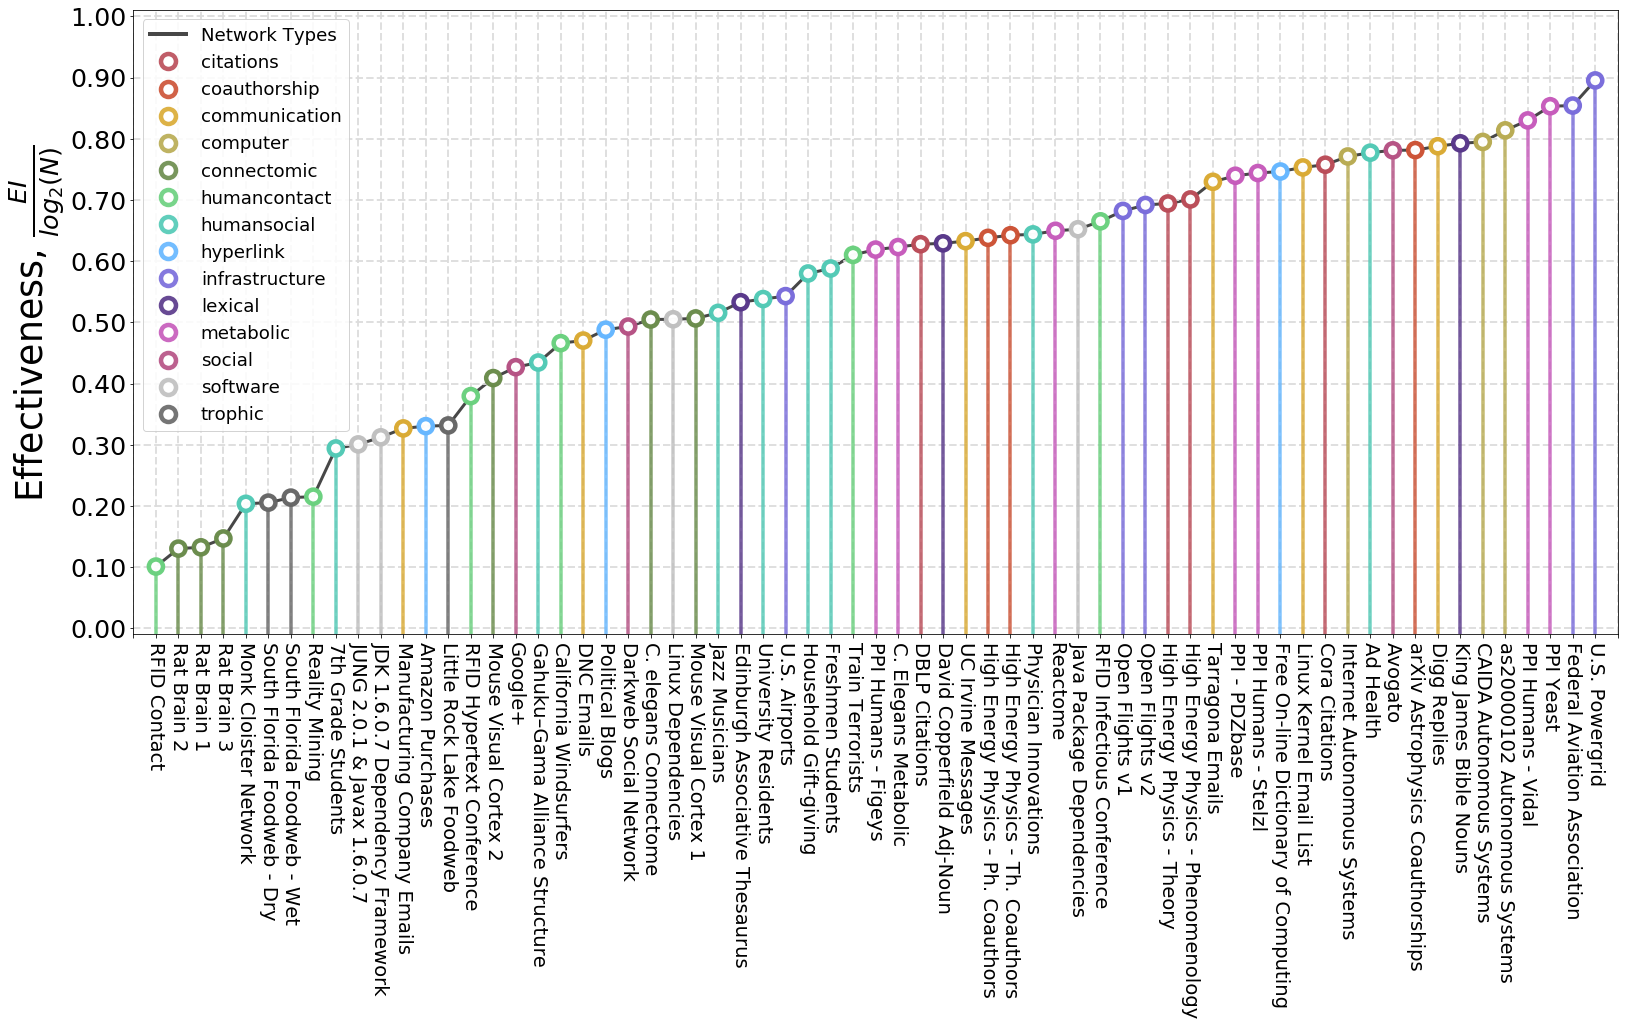

In [10]:
plt.rc('axes', axisbelow=True)

id_order = np.argsort(konect_data['effec'])
colors = np.array(konect_data['color'])#[id_order]
konect_data['color'] = np.array([col_mapping[i] for i in konect_data['types']])[id_order]
colors = np.array(konect_data['color'])#[id_order]
mult = 1.4

plt.figure(figsize=(19*mult,8.2*mult))

plt.plot([-10],[-10], marker='', 
         markersize=18, alpha=0.9, linestyle='-', linewidth=4.0,
         markeredgecolor='#333333', color='#333333', markeredgewidth=5.5, 
         markerfacecolor="w", label='Network Types')

plt.vlines(sorted(id_order),-1,np.array(konect_data['effec'])[id_order], colors=colors, 
           linewidth=3.5, alpha=0.8, zorder=1)

plt.plot(sorted(id_order), np.array(konect_data['effec'])[id_order], alpha=0.9,
         marker='', linestyle='-', linewidth=3.0, color='#333333', zorder=0)

plt.scatter(sorted(id_order), np.array(konect_data['effec'])[id_order], 
            marker='o', s=200, alpha=0.98,
            edgecolors=colors, linewidths=4.5, facecolor="w")

for types, color in col_mapping.items():
    plt.plot([-10],[-10], marker='o', 
         markersize=15, alpha=0.9, linestyle='', linewidth=3.0,
         markeredgecolor=color, markeredgewidth=4.5, 
         markerfacecolor="w", label=types)

xtix = np.linspace(-1,len(konect_data['names']),len(konect_data['names'])+2)
xticklist = [""]
for i in range(len(konect_data['names'])):
    xticklist.append(np.array(konect_data['names'])[id_order][i])
xticklist.append("")

plt.xticks(xtix, xticklist, rotation=270, size=14*mult)
plt.yticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=18*mult)
plt.grid(alpha=0.9, color='gainsboro', linestyle='--', linewidth=2.0)
plt.xlim(-1,len(konect_data['names']))
plt.ylim(-0.01,1.01)
plt.ylabel(r'Effectiveness, $\frac{EI}{log_2(N)}$', size=26*mult)
plt.legend(loc=2, fontsize=13*mult, framealpha=0.85)

# plt.savefig("../figs/pngs/Konect_SortedEffectiveness.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_SortedEffectiveness.pdf", bbox_inches='tight')
plt.show()

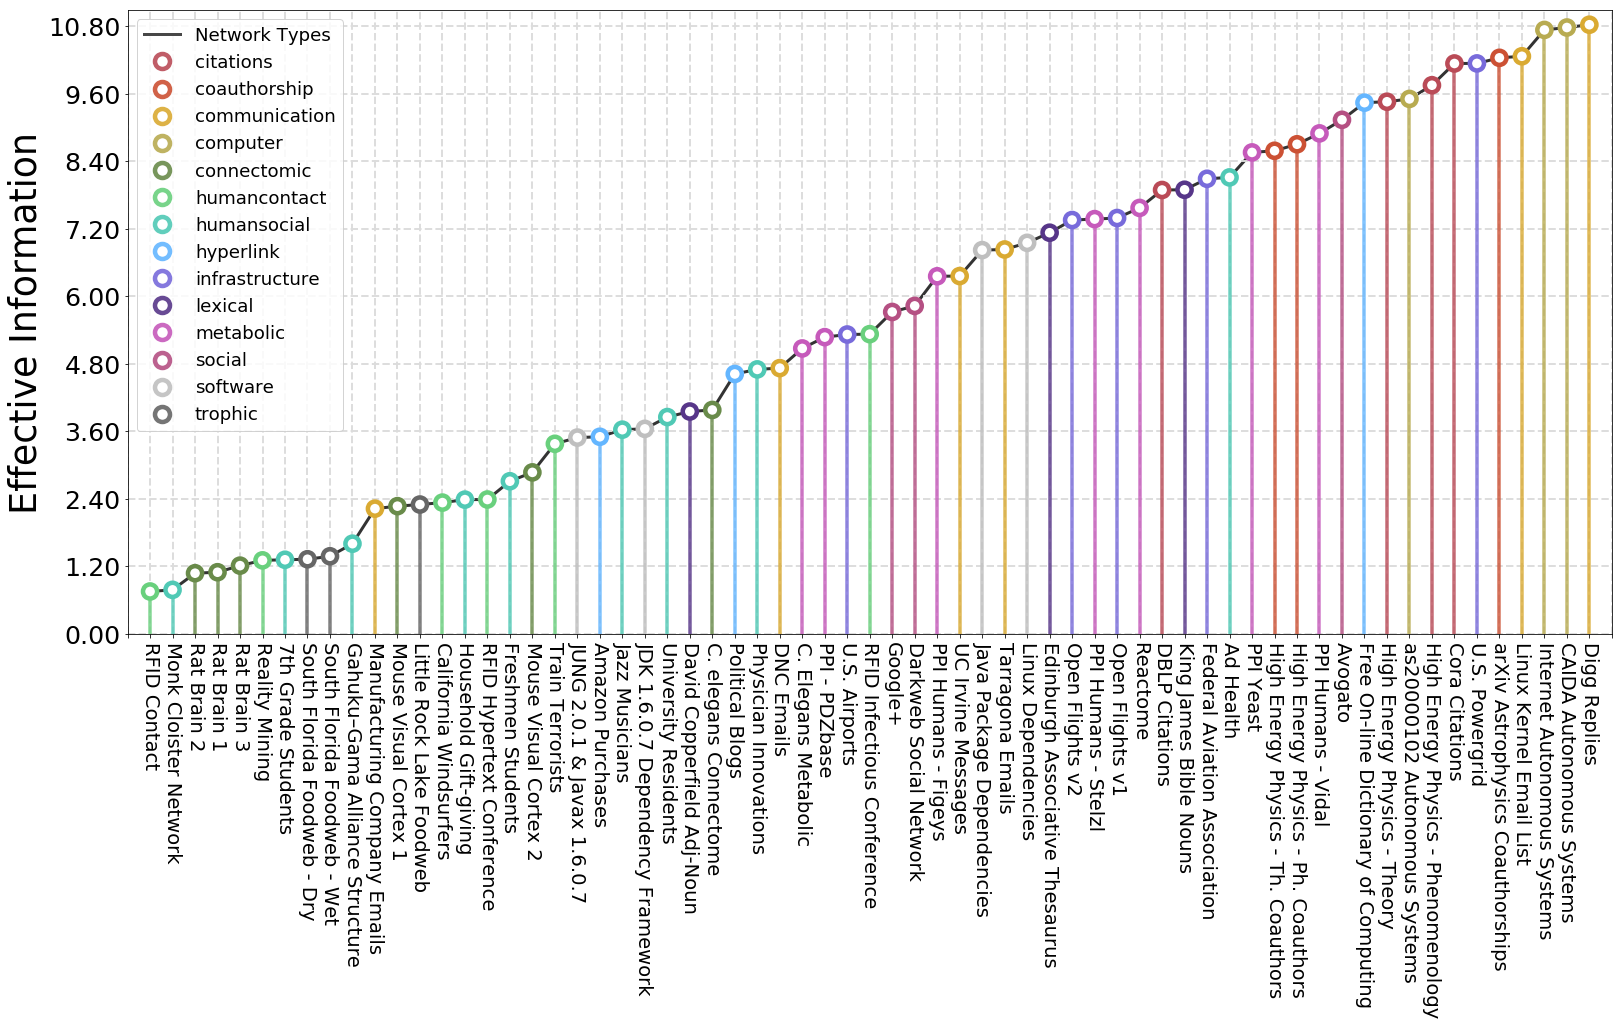

In [210]:
id_order = np.argsort(konect_data['effin'])
colors = np.array(konect_data['color'])#[id_order]
konect_data['color'] = np.array([col_mapping[i] for i in konect_data['types']])[id_order]
colors = np.array(konect_data['color'])#[id_order]
mult = 1.4

plt.figure(figsize=(19*mult,8.2*mult))

plt.plot([-10],[-10], marker='', 
         markersize=18, alpha=0.9, linestyle='-', linewidth=3.0,
         markeredgecolor='#333333', color='#333333', markeredgewidth=5.5, 
         markerfacecolor="w", label='Network Types')

plt.vlines(sorted(id_order),-1,np.array(konect_data['effin'])[id_order], colors=colors, 
           linewidth=3.5, alpha=0.8, zorder=1)

plt.plot(sorted(id_order), np.array(konect_data['effin'])[id_order], 
         marker='', linestyle='-', linewidth=3.0, color='#333333', zorder=0)

plt.scatter(sorted(id_order), np.array(konect_data['effin'])[id_order], 
            marker='o', s=200, alpha=1.0,
            edgecolors=colors, linewidths=4.5, facecolor="w")

for types, color in col_mapping.items():
    plt.plot([-10],[-10], marker='o', 
         markersize=15, alpha=0.9, linestyle='', linewidth=3.0,
         markeredgecolor=color, markeredgewidth=4.5, 
         markerfacecolor="w", label=types)

xtix = np.linspace(-1,len(konect_data['names']),len(konect_data['names'])+2)
xticklist = [""]
for i in range(len(konect_data['names'])):
    xticklist.append(np.array(konect_data['names'])[id_order][i])
xticklist.append("")

plt.xticks(xtix, xticklist, rotation=270, size=14*mult)
plt.yticks(np.linspace(0,13,11), ["%.2f"%i for i in np.linspace(0,12,11)], size=18*mult)
plt.grid(alpha=0.95, color='gainsboro', linestyle='--', linewidth=2.0)
plt.xlim(-1,len(konect_data['names']))
plt.ylim(-0.01,12.01)
plt.ylabel('Effective Information', size=26*mult)
plt.legend(loc=2, fontsize=13*mult, framealpha=0.85)

# plt.savefig("../figs/pngs/Konect_SortedEffectiveInfo.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_SortedEffectiveInfo.pdf", bbox_inches='tight')
plt.show()

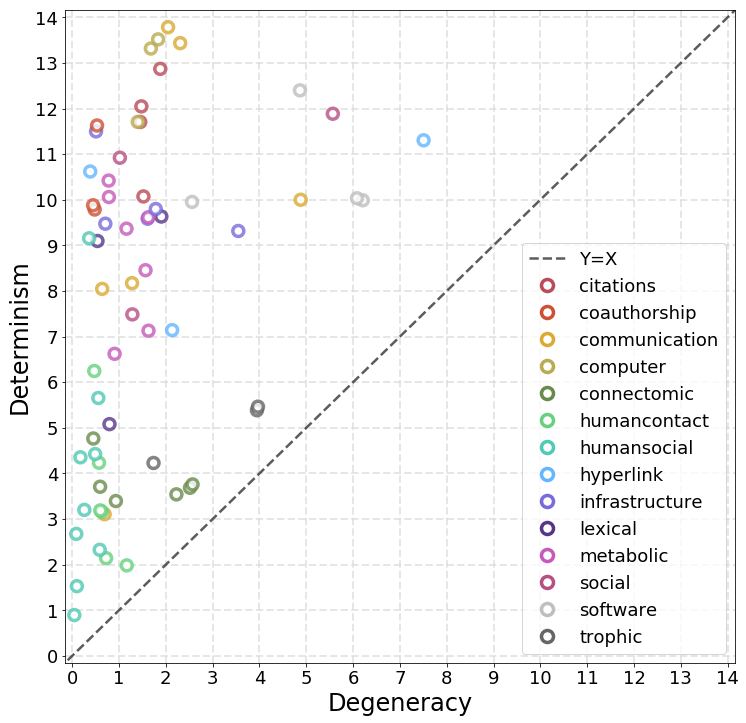

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
plt.plot([-0.5, 20.5], [-0.5, 20.5], marker='', linestyle='--', 
            linewidth=2.5, color='#333333', label='Y=X', alpha=0.8)

ma = 'o'
si = 120
det = np.array(konect_data['deter'])
deg = np.array(konect_data['degen'])
eff = np.array(konect_data['effec'])
eis = np.array(konect_data['effin'])
id_order = np.argsort(eis)
col = np.array(konect_data['color'])
lab = np.array(konect_data['names'])

ax.scatter((deg)[id_order], (det)[id_order], marker=ma, s=si, 
           color='w', alpha=0.80, edgecolors=col, linewidths=3.5)
for i in col_mapping.keys():
    ax.plot([-10],[-10],marker=ma,markersize=si/10,label=i,color='w',linestyle='',
            markeredgecolor=col_mapping[i], markeredgewidth=3.5)

ax.set_xlabel("Degeneracy", size=24)
ax.set_ylabel("Determinism", size=24)
ax.set_xticks(np.linspace(0,14,15))
ax.set_yticks(np.linspace(0,14,15))
ax.set_xticklabels(np.linspace(0,14,15,dtype=int), fontsize=18)
ax.set_yticklabels(np.linspace(0,14,15,dtype=int), fontsize=18)
ax.set_xlim(-0.15, 14.15)
ax.set_ylim(-0.15, 14.15)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=18, framealpha=0.8)

# plt.savefig("../figs/pngs/Konect_Determ_Degen.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_Determ_Degen.pdf", bbox_inches='tight')
plt.show()

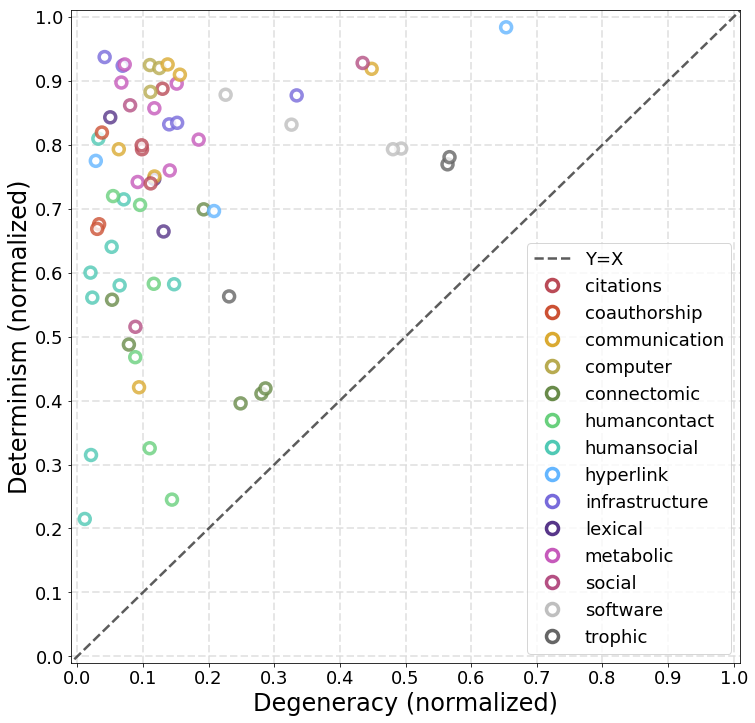

In [196]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
plt.plot([-0.5, 20.5], [-0.5, 20.5], marker='', linestyle='--', 
            linewidth=2.5, color='#333333', label='Y=X', alpha=0.8)

ma = 'o'
si = 120
det = np.array(konect_data['deter'])
deg = np.array(konect_data['degen'])
eff = np.array(konect_data['effec'])
eis = np.array(konect_data['effin'])
id_order = np.argsort(eis)
col = np.array(konect_data['color'])
lab = np.array(konect_data['names'])
N   = np.array(konect_data['nodes'])

ax.scatter((deg/np.log2(N))[id_order], (det/np.log2(N))[id_order], marker=ma, s=si, 
           color='w', alpha=0.80, edgecolors=col, linewidths=3.5)

for i in col_mapping.keys():
    ax.plot([-10],[-10],marker=ma,markersize=si/10,label=i,color='w',linestyle='',
            markeredgecolor=col_mapping[i], markeredgewidth=3.5)

ax.set_xlabel("Degeneracy (normalized)", size=24)
ax.set_ylabel("Determinism (normalized)", size=24)
ax.set_xticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_yticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_xticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=18)
ax.set_yticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=18)
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(-0.01, 1.01)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=18, framealpha=0.8)

# plt.savefig("../figs/pngs/Konect_NormDeterm_NormDegen.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_NormDeterm_NormDegen.pdf", bbox_inches='tight')
plt.show()

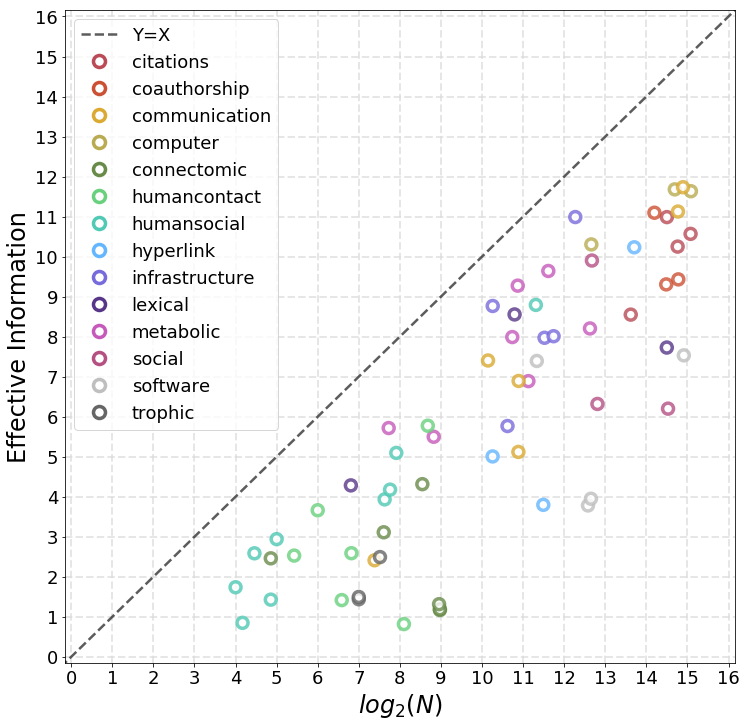

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
plt.plot([-0.5, 20.5], [-0.5, 20.5], marker='', linestyle='--', 
            linewidth=2.5, color='#333333', label='Y=X', alpha=0.8)

ma = 'o'
si = 120
det = np.array(konect_data['deter'])
deg = np.array(konect_data['degen'])
eff = np.array(konect_data['effec'])
eis = np.array(konect_data['effin'])
id_order = np.argsort(eis)
# id_order = np.argsort(eff)
col = np.array(konect_data['color'])
lab = np.array(konect_data['names'])
N   = np.array(konect_data['nodes'])

ax.scatter(np.log2(N)[id_order], eis[id_order], marker=ma, s=si, 
           color='w', alpha=0.80, edgecolors=col, linewidths=3.5)
for i in col_mapping.keys():
    ax.plot([-10],[-10],marker=ma,markersize=si/10,label=i,color='w',linestyle='',
            markeredgecolor=col_mapping[i], markeredgewidth=3.5)
ax.set_xlabel("$log_2(N)$", size=24)
ax.set_ylabel("Effective Information", size=24)
ax.set_xticks(np.linspace(0,16,17))
ax.set_yticks(np.linspace(0,16,17))
ax.set_xticklabels(np.linspace(0,16,17,dtype=int), fontsize=18)
ax.set_yticklabels(np.linspace(0,16,17,dtype=int), fontsize=18)
ax.set_xlim(-0.15, 16.15)
ax.set_ylim(-0.15, 16.15)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=18, framealpha=0.8)
# ax.legend(bbox_to_anchor=(1.0,1.0), fontsize=16, framealpha=0.8)

# plt.savefig("../figs/pngs/Konect_EffectiveInfo_log2N.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_EffectiveInfo_log2N.pdf", bbox_inches='tight')
plt.show()

In [226]:
newty = ["information","information","social","technological","biological","social","social","information",
         "technological","information","biological","social","information","biological"]
newty = dict(zip(list(np.unique(konect_data['types'])), newty))

konect_data['newty'] = [newty[i] for i in konect_data['types']]

newco = ["#c34b57","#c6b950","#865db4","#64b9b0"]
newco = dict(zip(list(np.unique(konect_data['newty'])), newco))

konect_data['newco'] = [newco[i] for i in konect_data['newty']]

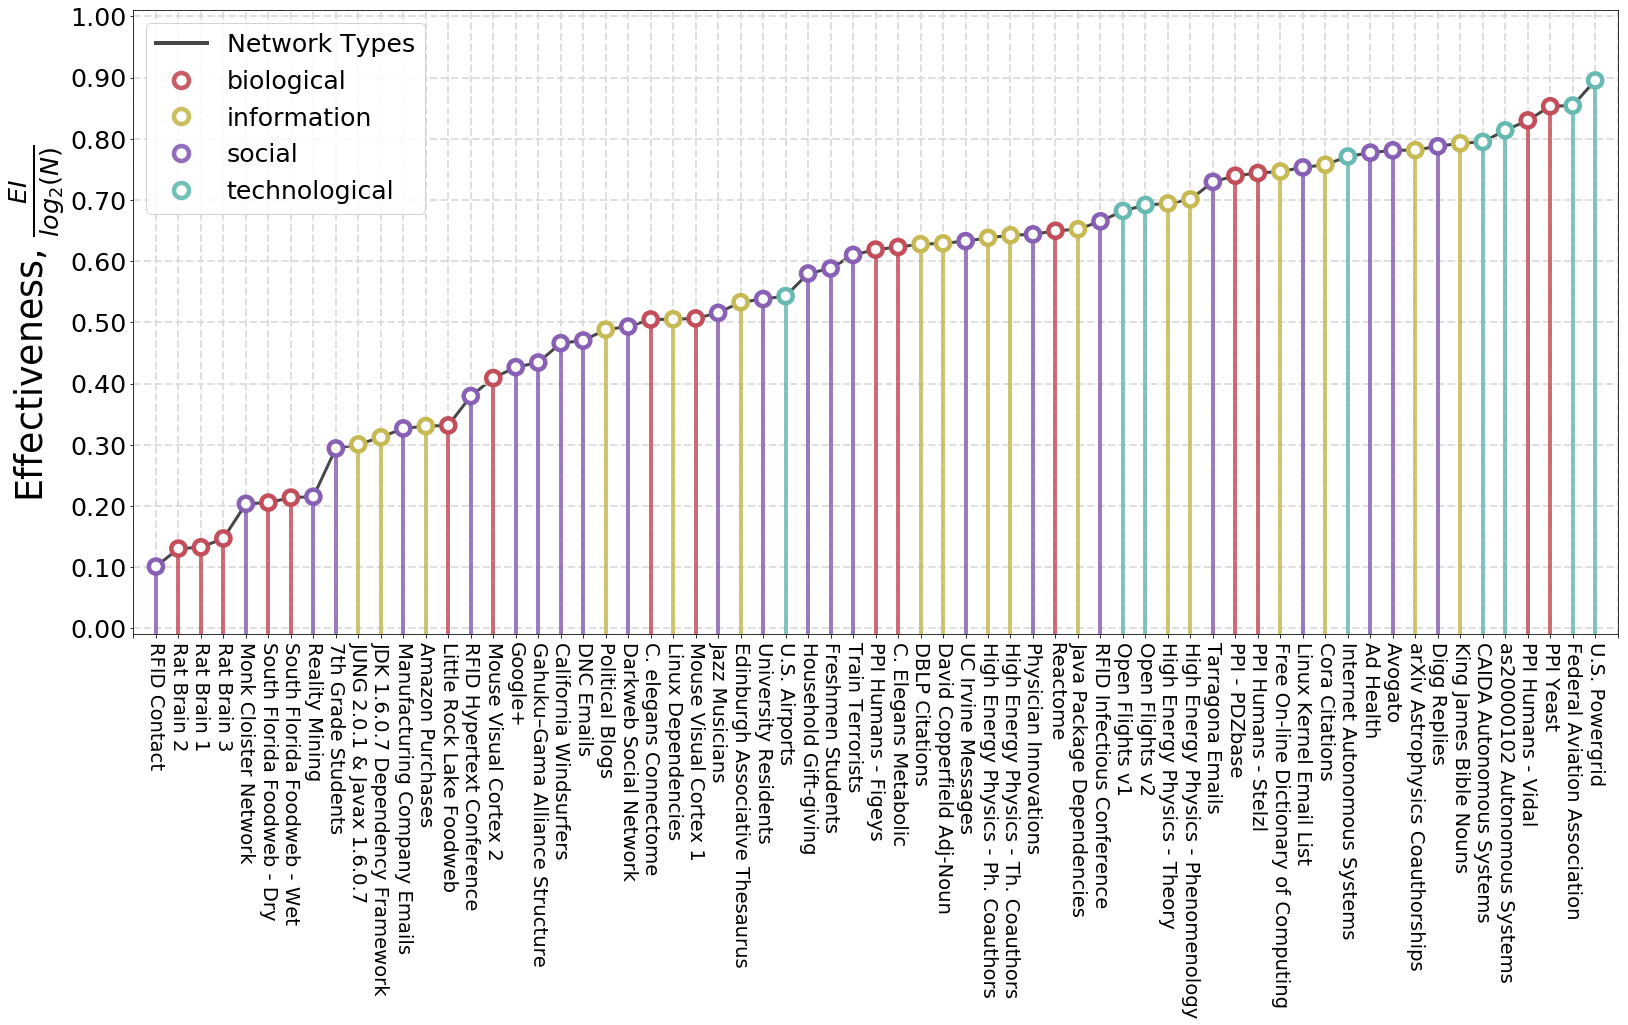

In [242]:
plt.rc('axes', axisbelow=True)

id_order = np.argsort(konect_data['effec'])
colors = np.array(konect_data['newco'])[id_order]
mult = 1.4

plt.figure(figsize=(19*mult,8.2*mult))

plt.plot([-10],[-10], marker='', 
         markersize=18, alpha=0.9, linestyle='-', linewidth=4.0,
         markeredgecolor='#333333', color='#333333', markeredgewidth=5.5, 
         markerfacecolor="w", label='Network Types')

plt.vlines(sorted(id_order),-1,np.array(konect_data['effec'])[id_order], colors=colors, 
           linewidth=4.0, alpha=0.8, zorder=1)

plt.plot(sorted(id_order), np.array(konect_data['effec'])[id_order], alpha=0.9,
         marker='', linestyle='-', linewidth=3.0, color='#333333', zorder=0)

plt.scatter(sorted(id_order), np.array(konect_data['effec'])[id_order], 
            marker='o', s=200, alpha=0.98,
            edgecolors=colors, linewidths=4.5, facecolor="w")

for types, color in newco.items():
    plt.plot([-10],[-10], marker='o', 
         markersize=15, alpha=0.9, linestyle='', linewidth=3.0,
         markeredgecolor=color, markeredgewidth=4.5, 
         markerfacecolor="w", label=types)

xtix = np.linspace(-1,len(konect_data['names']),len(konect_data['names'])+2)
xticklist = [""]
for i in range(len(konect_data['names'])):
    xticklist.append(np.array(konect_data['names'])[id_order][i])
xticklist.append("")

plt.xticks(xtix, xticklist, rotation=270, size=14*mult)
plt.yticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=18*mult)
plt.grid(alpha=0.9, color='gainsboro', linestyle='--', linewidth=2.0)
plt.xlim(-1,len(konect_data['names']))
plt.ylim(-0.01,1.01)
plt.ylabel(r'Effectiveness, $\frac{EI}{log_2(N)}$', size=26*mult)
plt.legend(loc=2, fontsize=18*mult, framealpha=0.85)

# plt.savefig("../figs/pngs/Konect_SortedEffectiveness_4col.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_SortedEffectiveness_4col.pdf", bbox_inches='tight')
plt.show()

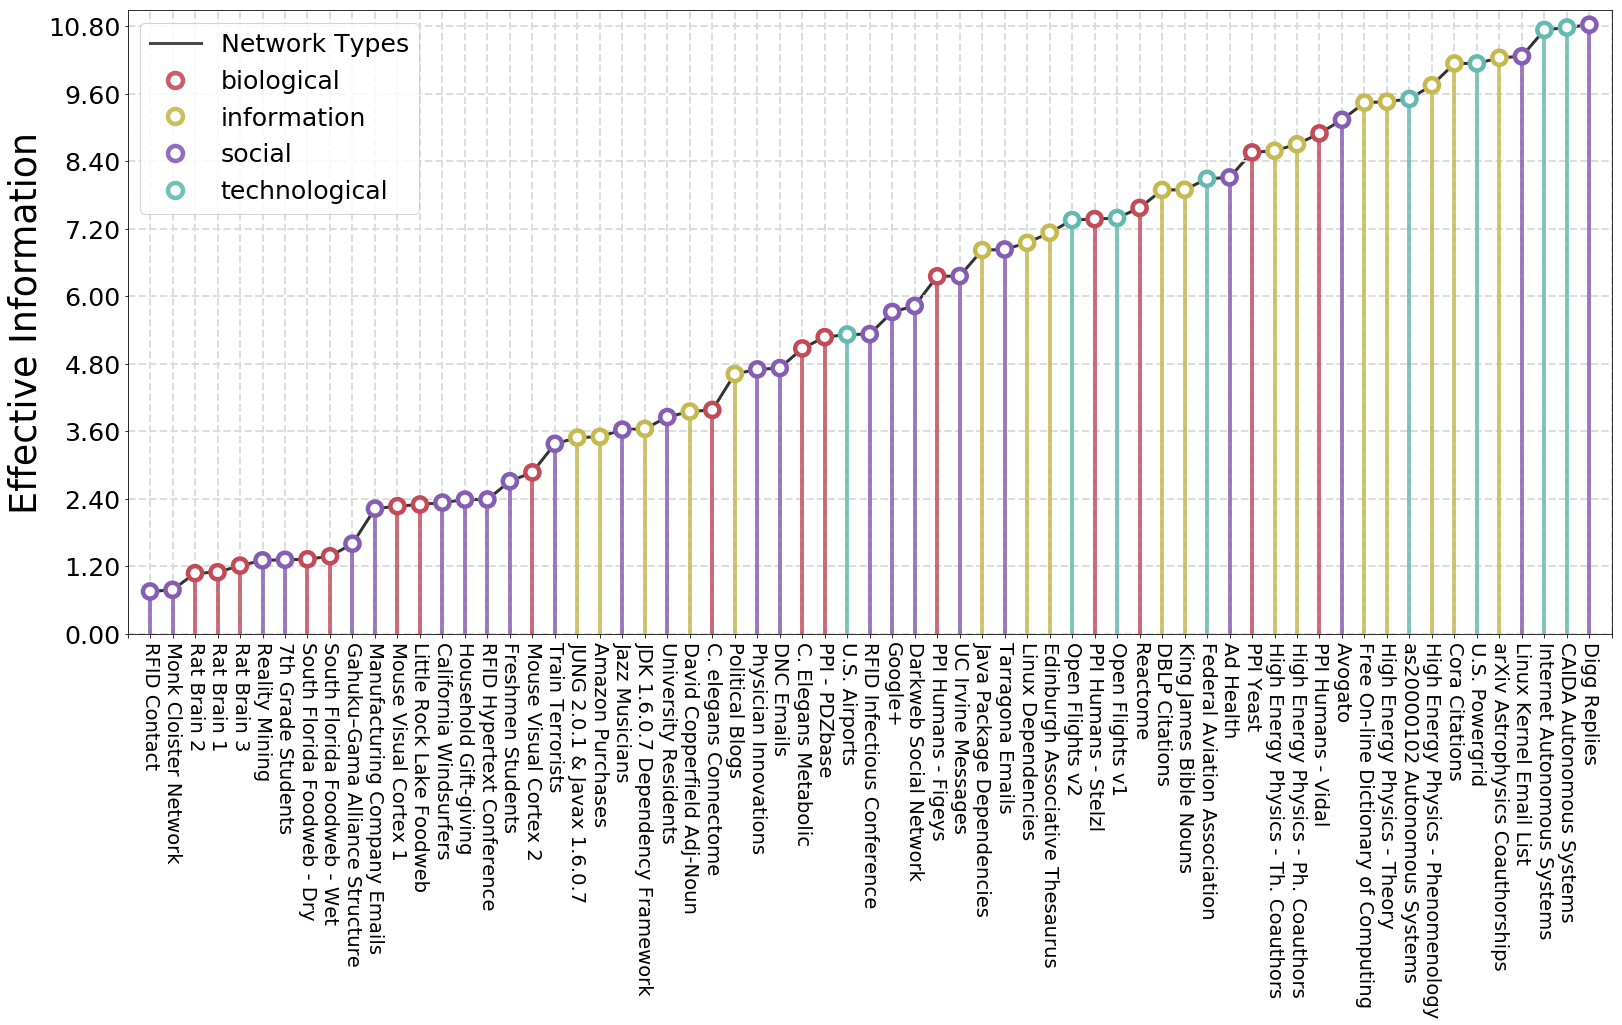

In [243]:
id_order = np.argsort(konect_data['effin'])
colors = np.array(konect_data['newco'])[id_order]
mult = 1.4

plt.figure(figsize=(19*mult,8.2*mult))

plt.plot([-10],[-10], marker='', 
         markersize=18, alpha=0.9, linestyle='-', linewidth=3.0,
         markeredgecolor='#333333', color='#333333', markeredgewidth=5.5, 
         markerfacecolor="w", label='Network Types')

plt.vlines(sorted(id_order),-1,np.array(konect_data['effin'])[id_order], colors=colors, 
           linewidth=4.0, alpha=0.8, zorder=1)

plt.plot(sorted(id_order), np.array(konect_data['effin'])[id_order], 
         marker='', linestyle='-', linewidth=3.0, color='#333333', zorder=0)

plt.scatter(sorted(id_order), np.array(konect_data['effin'])[id_order], 
            marker='o', s=200, alpha=1.0,
            edgecolors=colors, linewidths=4.5, facecolor="w")

for types, color in newco.items():
    plt.plot([-10],[-10], marker='o', 
         markersize=15, alpha=0.9, linestyle='', linewidth=3.0,
         markeredgecolor=color, markeredgewidth=4.5, 
         markerfacecolor="w", label=types)

xtix = np.linspace(-1,len(konect_data['names']),len(konect_data['names'])+2)
xticklist = [""]
for i in range(len(konect_data['names'])):
    xticklist.append(np.array(konect_data['names'])[id_order][i])
xticklist.append("")

plt.xticks(xtix, xticklist, rotation=270, size=14*mult)
plt.yticks(np.linspace(0,13,11), ["%.2f"%i for i in np.linspace(0,12,11)], size=18*mult)
plt.grid(alpha=0.95, color='gainsboro', linestyle='--', linewidth=2.0)
plt.xlim(-1,len(konect_data['names']))
plt.ylim(-0.01,12.01)
plt.ylabel('Effective Information', size=26*mult)
plt.legend(loc=2, fontsize=18*mult, framealpha=0.85)

# plt.savefig("../figs/pngs/Konect_SortedEffectiveInfo_4col.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_SortedEffectiveInfo_4col.pdf", bbox_inches='tight')
plt.show()

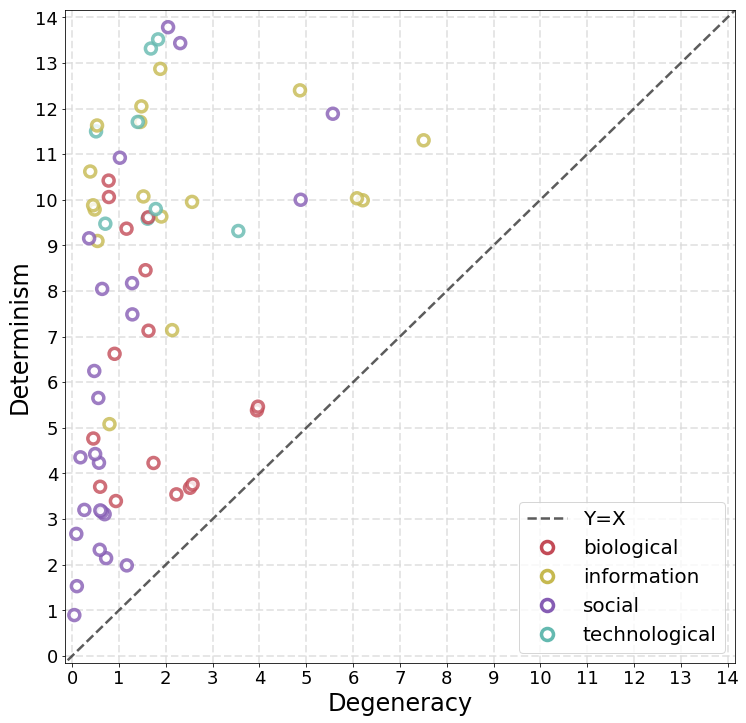

In [238]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
plt.plot([-0.5, 20.5], [-0.5, 20.5], marker='', linestyle='--', 
            linewidth=2.5, color='#333333', label='Y=X', alpha=0.8)

ma = 'o'
si = 120
det = np.array(konect_data['deter'])
deg = np.array(konect_data['degen'])
eff = np.array(konect_data['effec'])
eis = np.array(konect_data['effin'])
id_order = np.argsort(eis)
col = np.array(konect_data['newco'])[id_order]
lab = np.array(konect_data['names'])

ax.scatter((deg)[id_order], (det)[id_order], marker=ma, s=si, 
           color='w', alpha=0.80, edgecolors=col, linewidths=3.5)
for i in newco.keys():
    ax.plot([-10],[-10],marker=ma,markersize=si/10,label=i,color='w',linestyle='',
            markeredgecolor=newco[i], markeredgewidth=3.5)

ax.set_xlabel("Degeneracy", size=24)
ax.set_ylabel("Determinism", size=24)
ax.set_xticks(np.linspace(0,14,15))
ax.set_yticks(np.linspace(0,14,15))
ax.set_xticklabels(np.linspace(0,14,15,dtype=int), fontsize=18)
ax.set_yticklabels(np.linspace(0,14,15,dtype=int), fontsize=18)
ax.set_xlim(-0.15, 14.15)
ax.set_ylim(-0.15, 14.15)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=20, framealpha=0.8)

# plt.savefig("../figs/pngs/Konect_Determ_Degen_4col.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_Determ_Degen_4col.pdf", bbox_inches='tight')
plt.show()

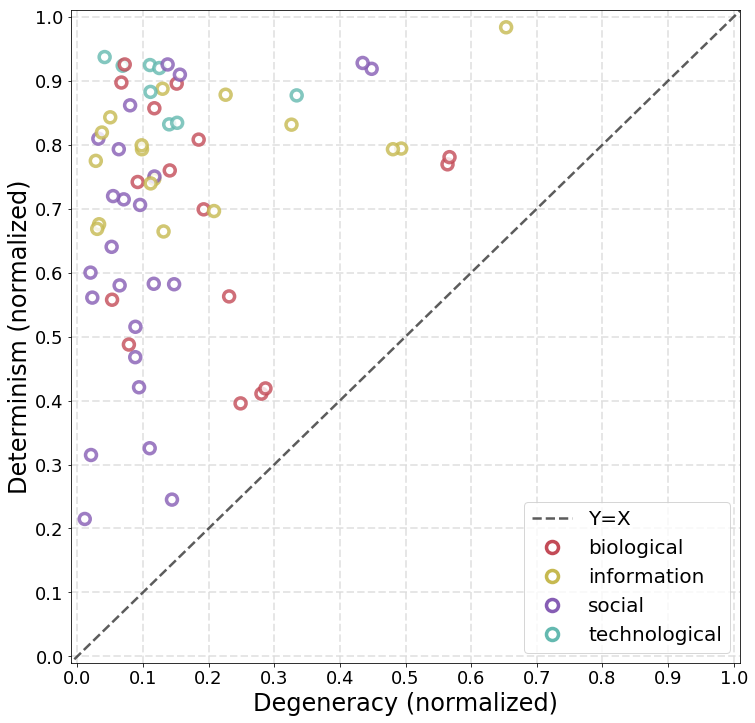

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
plt.plot([-0.5, 20.5], [-0.5, 20.5], marker='', linestyle='--', 
            linewidth=2.5, color='#333333', label='Y=X', alpha=0.8)

ma = 'o'
si = 120
det = np.array(konect_data['deter'])
deg = np.array(konect_data['degen'])
eff = np.array(konect_data['effec'])
eis = np.array(konect_data['effin'])
id_order = np.argsort(eis)
col = np.array(konect_data['newco'])[id_order]
lab = np.array(konect_data['names'])
N   = np.array(konect_data['nodes'])

ax.scatter((deg/np.log2(N))[id_order], (det/np.log2(N))[id_order], marker=ma, s=si, 
           color='w', alpha=0.80, edgecolors=col, linewidths=3.5)
for i in newco.keys():
    ax.plot([-10],[-10],marker=ma,markersize=si/10,label=i,color='w',linestyle='',
            markeredgecolor=newco[i], markeredgewidth=3.5)

ax.set_xlabel("Degeneracy (normalized)", size=24)
ax.set_ylabel("Determinism (normalized)", size=24)
ax.set_xticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_yticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_xticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=18)
ax.set_yticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=18)
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(-0.01, 1.01)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=20, framealpha=0.8)

# plt.savefig("../figs/pngs/Konect_NormDeterm_NormDegen_4col.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_NormDeterm_NormDegen_4col.pdf", bbox_inches='tight')
plt.show()

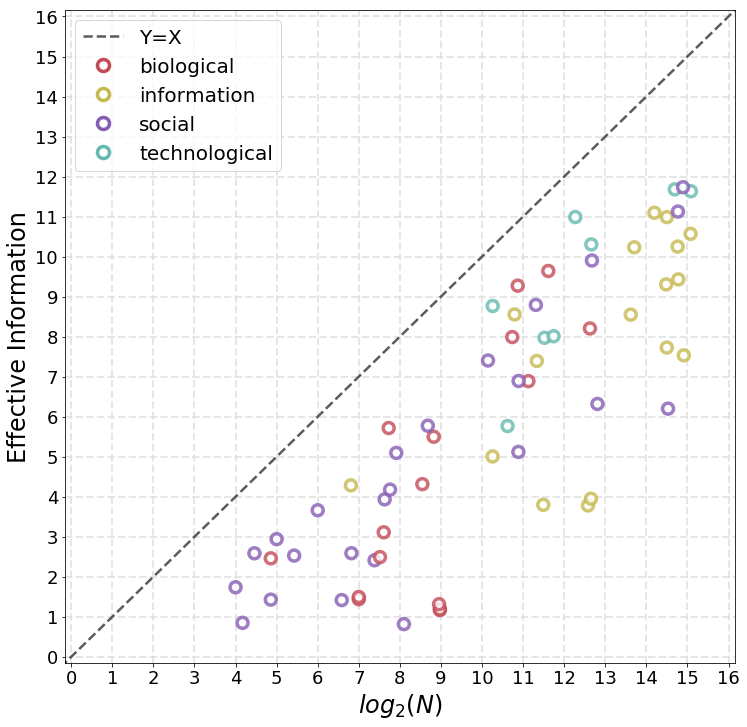

In [241]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
plt.plot([-0.5, 20.5], [-0.5, 20.5], marker='', linestyle='--', 
            linewidth=2.5, color='#333333', label='Y=X', alpha=0.8)

ma = 'o'
si = 120
det = np.array(konect_data['deter'])
deg = np.array(konect_data['degen'])
eff = np.array(konect_data['effec'])
eis = np.array(konect_data['effin'])
id_order = np.argsort(eis)
col = np.array(konect_data['newco'])[id_order]
lab = np.array(konect_data['names'])
N   = np.array(konect_data['nodes'])

ax.scatter(np.log2(N)[id_order], eis[id_order], marker=ma, s=si, 
           color='w', alpha=0.80, edgecolors=col, linewidths=3.5)
for i in newco.keys():
    ax.plot([-10],[-10],marker=ma,markersize=si/10,label=i,color='w',linestyle='',
            markeredgecolor=newco[i], markeredgewidth=3.5)

ax.set_xlabel("$log_2(N)$", size=24)
ax.set_ylabel("Effective Information", size=24)
ax.set_xticks(np.linspace(0,16,17))
ax.set_yticks(np.linspace(0,16,17))
ax.set_xticklabels(np.linspace(0,16,17,dtype=int), fontsize=18)
ax.set_yticklabels(np.linspace(0,16,17,dtype=int), fontsize=18)
ax.set_xlim(-0.15, 16.15)
ax.set_ylim(-0.15, 16.15)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=20, framealpha=0.8)
# ax.legend(bbox_to_anchor=(1.0,1.0), fontsize=16, framealpha=0.8)

# plt.savefig("../figs/pngs/Konect_EffectiveInfo_log2N_4col.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_EffectiveInfo_log2N_4col.pdf", bbox_inches='tight')
plt.show()

__________________________